In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import deque

200


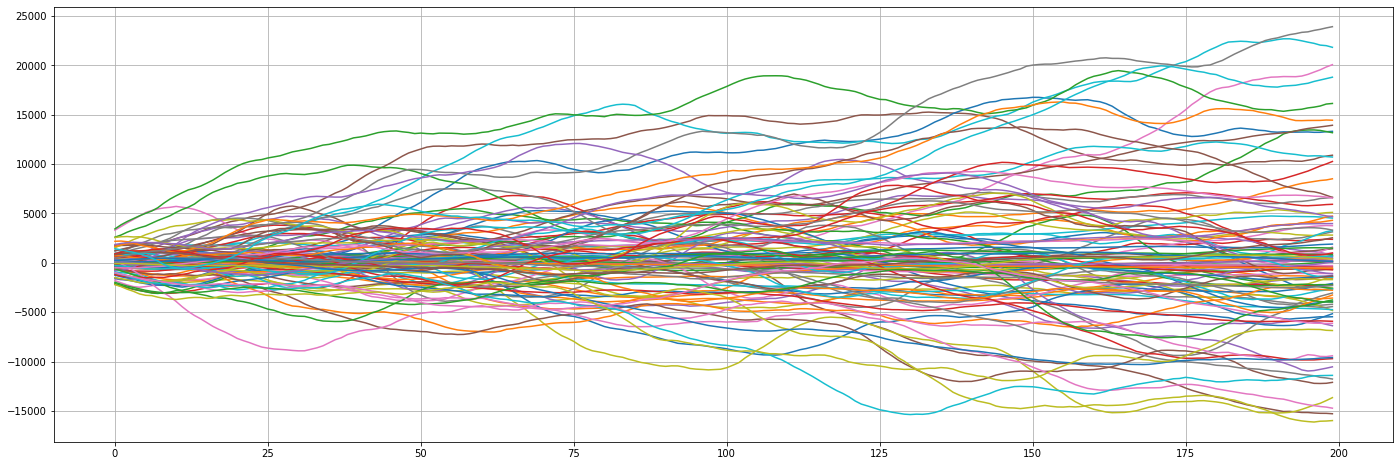

In [59]:
data = deque()
for _ in range(10000):
	new = [np.random.randint(-100, 100)]
	v = np.copy(new[-1])
	for _ in range(213):
		new.append(new[-1] + (v * np.random.normal(0, 1)))
	new = pd.DataFrame(new).rolling(window=15).sum() # smooth
	data.append((new.values / 2).tolist())

data = [[i[0] for i in j if not np.isnan(i[0])] for j in data]

print(len(data[0])) # should be 200

plt.figure(figsize=(24, 8))
for i in range(100):
	plt.plot(data[i])
plt.grid()
plt.show()

In [64]:
X = pd.DataFrame(np.array(data))
X

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,799.481443,830.418884,857.060437,866.830639,883.990297,924.730066,1019.771185,1073.441111,1094.162191,1080.379777,...,-1569.863141,-1811.552585,-2086.177967,-2338.283344,-2544.274630,-2686.572451,-2749.984224,-2737.071449,-2697.874214,-2615.958035
1,388.376344,325.460875,205.170086,30.217439,-90.101273,-205.109256,-250.915440,-218.238223,-191.751594,-137.502089,...,3795.378298,3808.819874,3813.432202,3916.581425,4045.351137,4077.278221,4115.588173,4117.342045,4205.952734,4298.299717
2,-23.924104,-22.077784,-27.274960,-34.651953,-51.831577,-76.266487,-108.730408,-140.629163,-166.427511,-182.002011,...,-208.873447,-189.137517,-161.884924,-130.149713,-92.016729,-50.950494,-10.244134,33.121115,78.057887,114.678789
3,-2168.269658,-2365.993585,-2522.490461,-2686.872252,-2782.232478,-2924.172340,-2992.142118,-3063.456071,-3094.682934,-3086.379895,...,2358.849170,2321.982397,2274.261401,2245.474461,2253.247991,2305.400835,2315.791004,2349.842981,2397.354501,2377.221198
4,35.362573,21.154478,22.819177,6.911168,2.104659,8.107143,-0.561011,0.320447,9.661839,23.252604,...,-1795.468115,-1740.433669,-1689.202366,-1636.230763,-1575.579414,-1512.860280,-1445.682600,-1389.620818,-1339.397115,-1286.764056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,139.220690,131.422288,131.071518,138.286686,147.079378,152.817383,148.687703,146.659948,135.963356,106.362527,...,-1400.826783,-1411.977745,-1427.494961,-1435.391805,-1447.003820,-1455.197903,-1462.460516,-1467.303302,-1448.541654,-1426.769054
9996,-446.256241,-546.720827,-672.539416,-825.719433,-970.436395,-1142.424389,-1295.079802,-1427.997862,-1557.879199,-1666.986298,...,17.958468,-54.082054,-73.033348,9.150065,89.877057,122.991200,90.714747,13.782464,-14.850075,-113.183203
9997,-178.999036,-293.306888,-398.462385,-568.968632,-725.177124,-867.732467,-1022.708516,-1091.762474,-1177.391052,-1186.468216,...,-2512.635860,-2139.813219,-1812.223960,-1571.264523,-1370.597089,-1184.336181,-983.588534,-881.018413,-694.177307,-521.583804
9998,-647.839317,-689.209802,-705.904396,-707.940372,-683.202960,-666.896765,-610.375189,-505.319002,-409.765665,-285.708643,...,-364.639179,-446.380749,-549.463472,-642.294833,-732.259462,-826.309013,-953.807844,-1064.993320,-1123.219842,-1131.735962


In [65]:
X.to_csv("train.csv", index=None, columns=None)

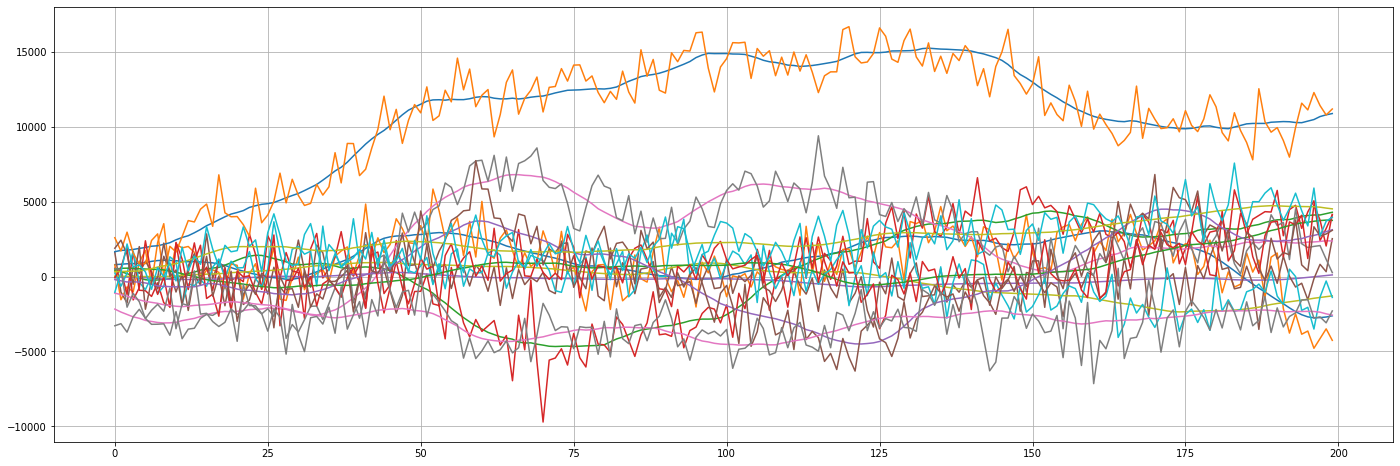

In [106]:
y = np.array(data)
y = y + (np.random.normal(0, 15, y.shape) * 80)

plt.figure(figsize=(24, 8))
for i in range(10):
	plt.plot(data[i])
	plt.plot(y[i])
plt.grid()
plt.show()

In [107]:
pd.DataFrame(y).to_csv("test.csv", index=None, columns=None)